In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from os.path import join  # merging paths in a better way
import os
import requests
import csv

Mounted at /content/drive


# Data Sets

Fetching Fear and Greed Index Data and Saving as CSV

In this part, I aimed at automating the process of fetching Fear and Greed Index data from the provided API link and saving it as a CSV file.

# First and Second Data Set

In [ ]:
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def save_as_csv(data, filename):
    try:
        with open(filename, 'w', newline='') as csvfile:
            csvfile.write(data)
        print("Data saved successfully as", filename)
    except Exception as e:
        print("Error saving data:", e)

if __name__ == "__main__":
    api_url = "https://alternative.me/crypto/fear-and-greed-index/#api"
    data = fetch_data(api_url)
    if data:
        data_path = "/content/drive/My Drive/CS 210"
        # Ensure the directory exists
        if not os.path.exists(data_path):
            os.makedirs(data_path)

        filename = os.path.join(data_path, "Fear_and_Greed_index.csv")
        save_as_csv(data, filename)

Data saved successfully as /content/drive/My Drive/CS 210/Fear_and_Greed_index.csv


In this part,
I convert the "Date" column in both datasets to datetime format for consistency and ease of manipulation. I defines start and end dates to filter the data within a specific range. I filter the Fear and Greed Index data (Fear) to include only rows within the desired date range and selects the "Date" and "Value" columns. I filter the stock market data (Stock) to include only rows within the desired date range and selects specific columns ("Date", "Bitcoin_Price", "Bitcoin_Vol.", and "S&P_500_Price"). Also, I convert the "Date" column in the stock market data back to a custom date format (%Y-%m-%d) for consistency with the Fear and Greed Index data. Overall, this part of the code sets up the necessary data for subsequent analysis or visualization. It focuses on preparing the data by filtering it based on a specified date range and selecting relevant columns for further exploration of relationships.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Read CSV file
file_path = '/content/drive/My Drive/CS 210/Stock Market Dataset.csv'
file_path2 = '/content/drive/My Drive/CS 210/fear_and_greed_index.csv'

df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

# Convert the "Date" column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

# Define the start and end dates
start_date = pd.to_datetime('2019-02-04')
end_date = pd.to_datetime('2024-02-02')

# Filter the DataFrame to include only rows within the desired range
Fear = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]

# Select only the "Date" and "Value" columns
Fear = Fear[['Date', 'Value']]

# Convert the "Date" column to datetime format, specifying the original format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter the DataFrame to include only rows within the desired range
Stock = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Select only the desired columns
selected_columns = ["Date", "Bitcoin_Price", "Bitcoin_Vol.", "S&P_500_Price"]
Stock = Stock[selected_columns]

# Convert the "Date" column back to the desired format
Stock['Date'] = Stock['Date'].dt.strftime('%Y-%m-%d')

Overall, this code ensures that the Stock and Fear DataFrames are properly aligned by date and contain only common dates before merging them into a single DataFrame for further analysis or visualization.

In [ ]:
# Convert date columns to datetime objects
Stock['Date'] = pd.to_datetime(Stock['Date'])
Fear['Date'] = pd.to_datetime(Fear['Date'])

# Sort dataframes by date
Stock.sort_values(by='Date', inplace=True)
Fear.sort_values(by='Date', inplace=True)

# Extract dates from both dataframes
stock_dates = set(Stock['Date'])
fear_dates = set(Fear['Date'])

# Find dates common in both dataframes
common_dates = stock_dates.intersection(fear_dates)

# Convert price columns to numeric
Stock['Bitcoin_Price'] = pd.to_numeric(df['Bitcoin_Price'].str.replace(',', ''))
Stock['S&P_500_Price'] = pd.to_numeric(df['S&P_500_Price'].str.replace(',', ''))

# Filter stock data based on common dates
Stock = Stock[Stock['Date'].isin(common_dates)]
Fear = Fear[Fear['Date'].isin(common_dates)]

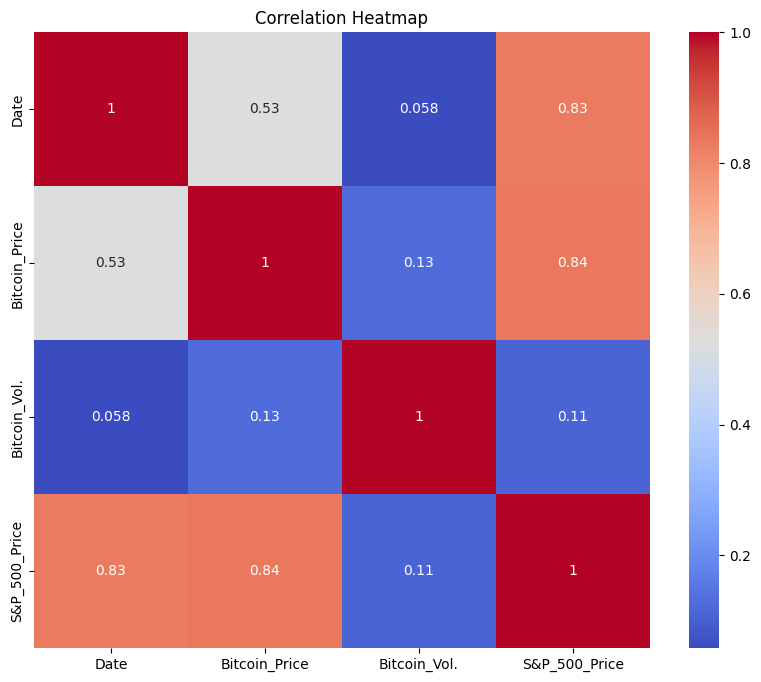

In [ ]:
 # Calculate correlation matrix
corr_matrix = Stock.corr()

    # Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data = pd.merge(Stock, Fear, on='Date')

# Setting 'timestamp' as the index
data.set_index('Date', inplace=True)

# Renaming 'value' column to 'fear_greed'
data.rename(columns={'Value': 'fear_greed'}, inplace=True)
data

,Bitcoin_Price,Bitcoin_Vol.,S&P_500_Price,fear_greed
Date,,,,
2019-02-04,3462.8,503920.0,2724.87,27
2019-02-05,3468.4,460950.0,2737.70,21
2019-02-06,3404.3,514210.0,2731.61,14
2019-02-07,3397.7,471360.0,2706.05,18
2019-02-08,3661.7,699230.0,2707.88,37
...,...,...,...,...
2024-01-29,43299.8,45230.0,4927.93,55
2024-01-30,42946.2,55130.0,4924.97,61
2024-01-31,42580.5,56480.0,4848.87,60


# Histograms & Scatter plots And Analyzes

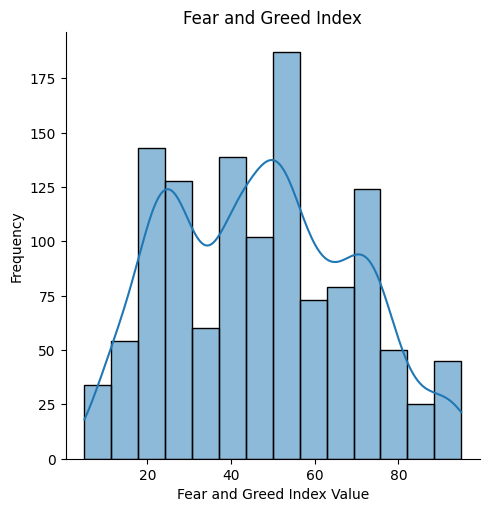

In [ ]:
# Plot the histogram using displot and set title
sns.displot(data=Fear["Value"], kde=True)
plt.title('Fear and Greed Index')

# Set x and y axis labels
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

This chart shows the change of the fear and greed index over a certain date range.

<Axes: xlabel='Date'>

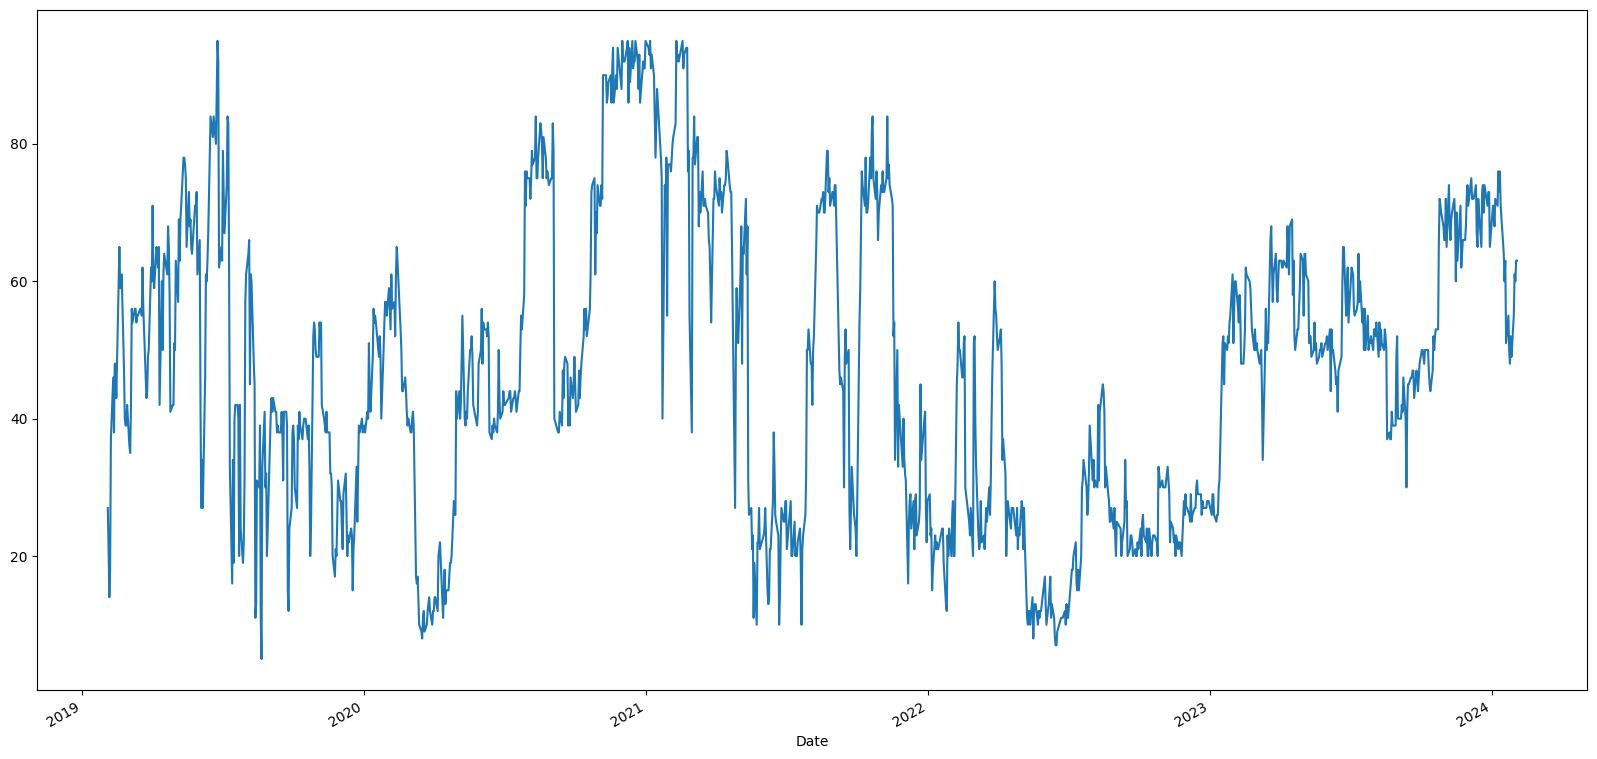

In [ ]:
# Plotting 'fear_greed' column
data['fear_greed'].plot(figsize=(20, 10))

This is boxplot of Fear & Greed Index, Also it shows the value of its mean and median.

Mean: 47.1456154465004
Median: 48.0


<Axes: xlabel='fear_greed'>

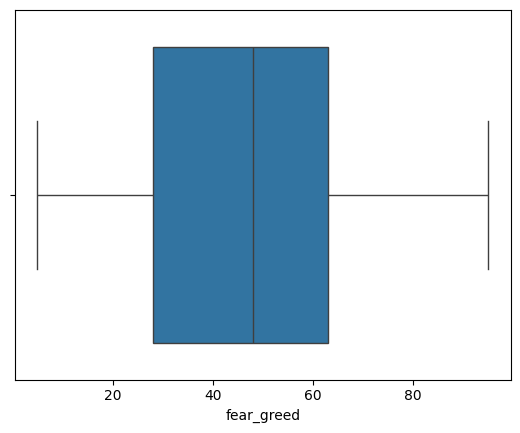

In [ ]:
# Calculate and print mean and median of the 'fear_greed' column
print("Mean: " + str(data['fear_greed'].mean()))
print("Median: " + str(data['fear_greed'].median()))

# Create a boxplot for the 'fear_greed' column using seaborn
sns.boxplot(x='fear_greed', data=data)

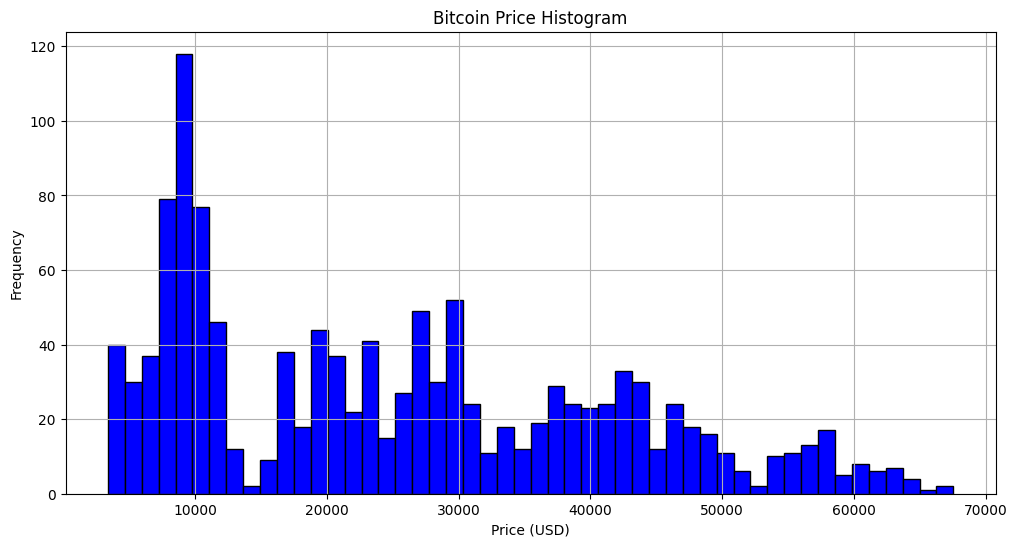

In [ ]:
# Calculate dynamic bins for Bitcoin prices
bitcoin_min = Stock['Bitcoin_Price'].min()
bitcoin_max = Stock['Bitcoin_Price'].max()
bitcoin_bins = [bitcoin_min + i * (bitcoin_max - bitcoin_min) / 50 for i in range(51)]

# Plot Bitcoin Price histogram
plt.figure(figsize=(12, 6))
plt.hist(Stock['Bitcoin_Price'], bins=bitcoin_bins, color='blue', edgecolor='black')
plt.title('Bitcoin Price Histogram')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='Date'>

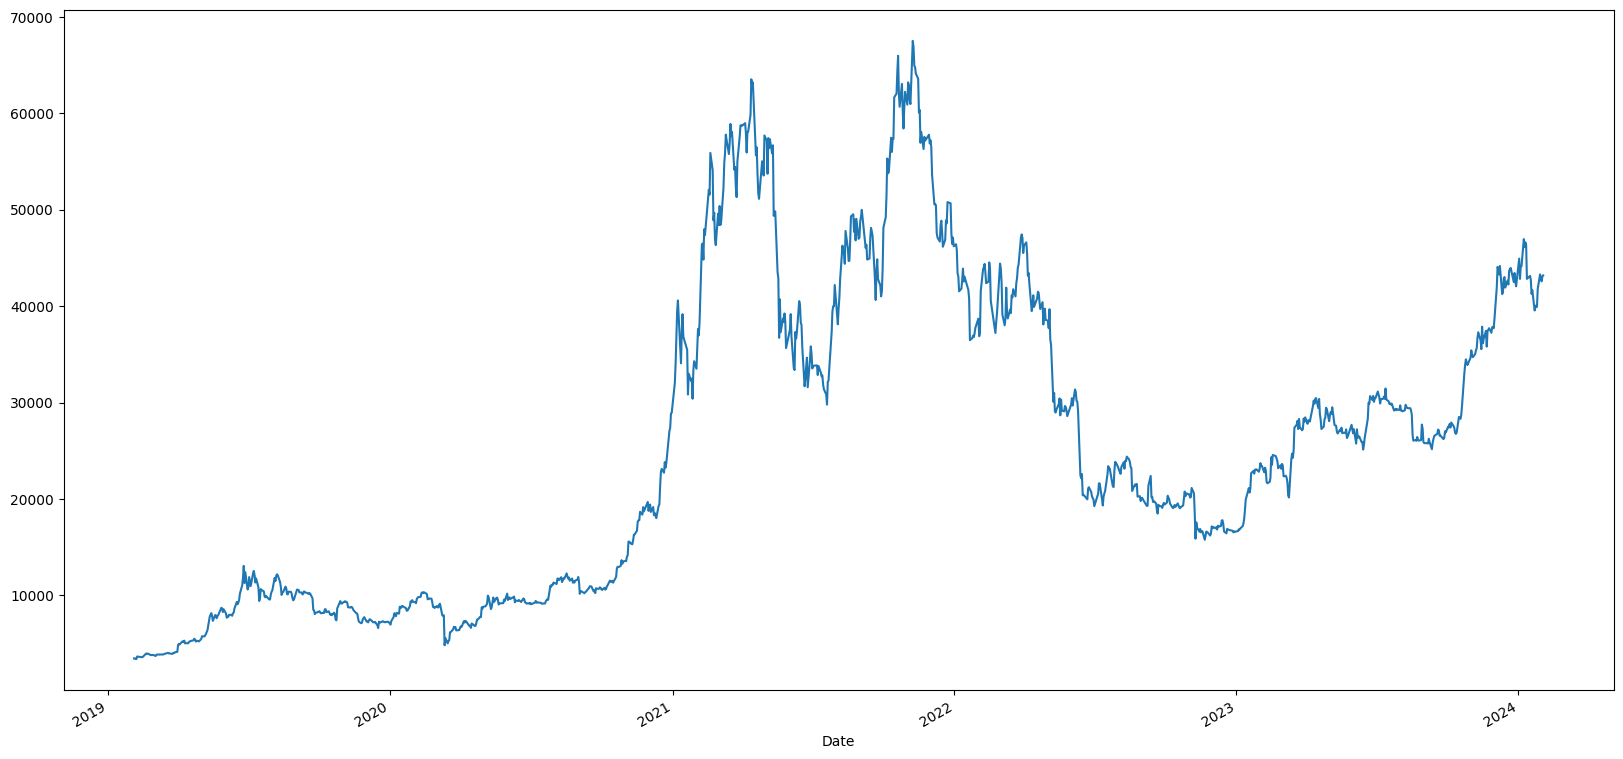

In [ ]:
# Plotting 'Bitcoin_Price' column
data['Bitcoin_Price'].plot(figsize=(20, 10))

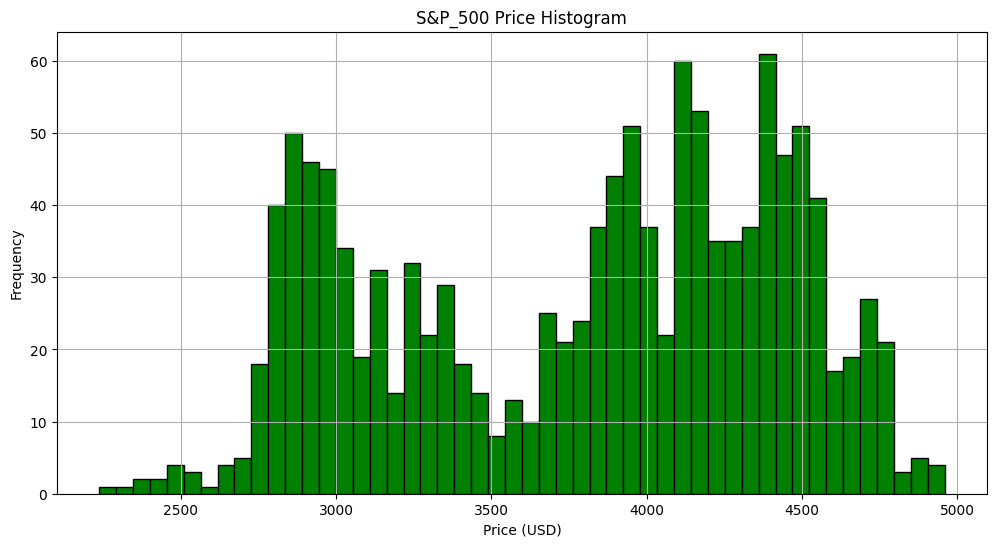

In [ ]:
# Calculate dynamic bins for S&P 500 prices
sp500_min = Stock['S&P_500_Price'].min()
sp500_max = Stock['S&P_500_Price'].max()
sp500_bins = [sp500_min + i * (sp500_max - sp500_min) / 50 for i in range(51)]

# Plot Bitcoin Price histogram
plt.figure(figsize=(12, 6))
plt.hist(Stock['S&P_500_Price'], bins=sp500_bins, color='green', edgecolor='black')
plt.title('S&P_500 Price Histogram')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is not any observabla correlation between bitcoin price and fear & greed index, so I want to use different analysis.

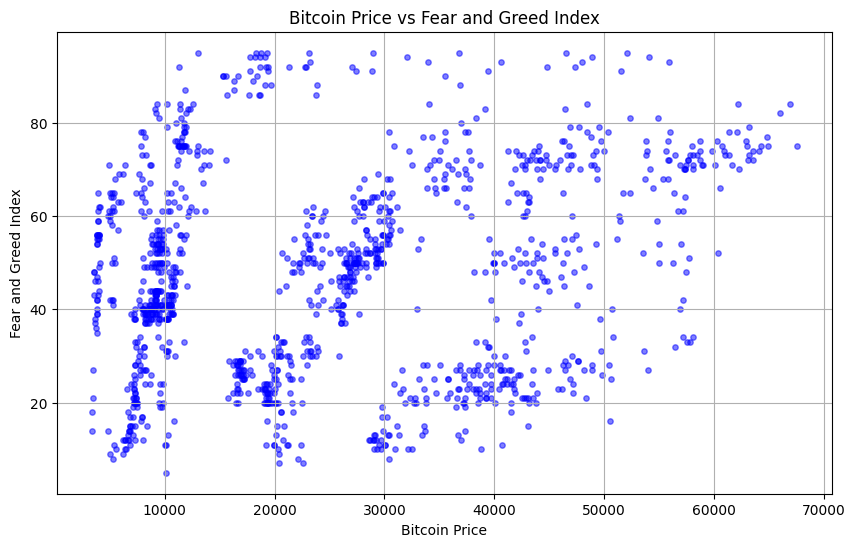

In [ ]:
# Step 1: Plot the Scatterplot
plt.figure(figsize=(10, 6))

# Plot Bitcoin prices in blue
plt.scatter(data['Bitcoin_Price'], data['fear_greed'], color='blue', alpha=0.5, label='Bitcoin Prices', s = 15)

plt.title('Bitcoin Price vs Fear and Greed Index')
plt.xlabel('Bitcoin Price')
plt.ylabel('Fear and Greed Index')
plt.grid(True)
plt.show()

In this part, I want to see the changes of bitcoin price and fear & greed index on the same axis (y axis).

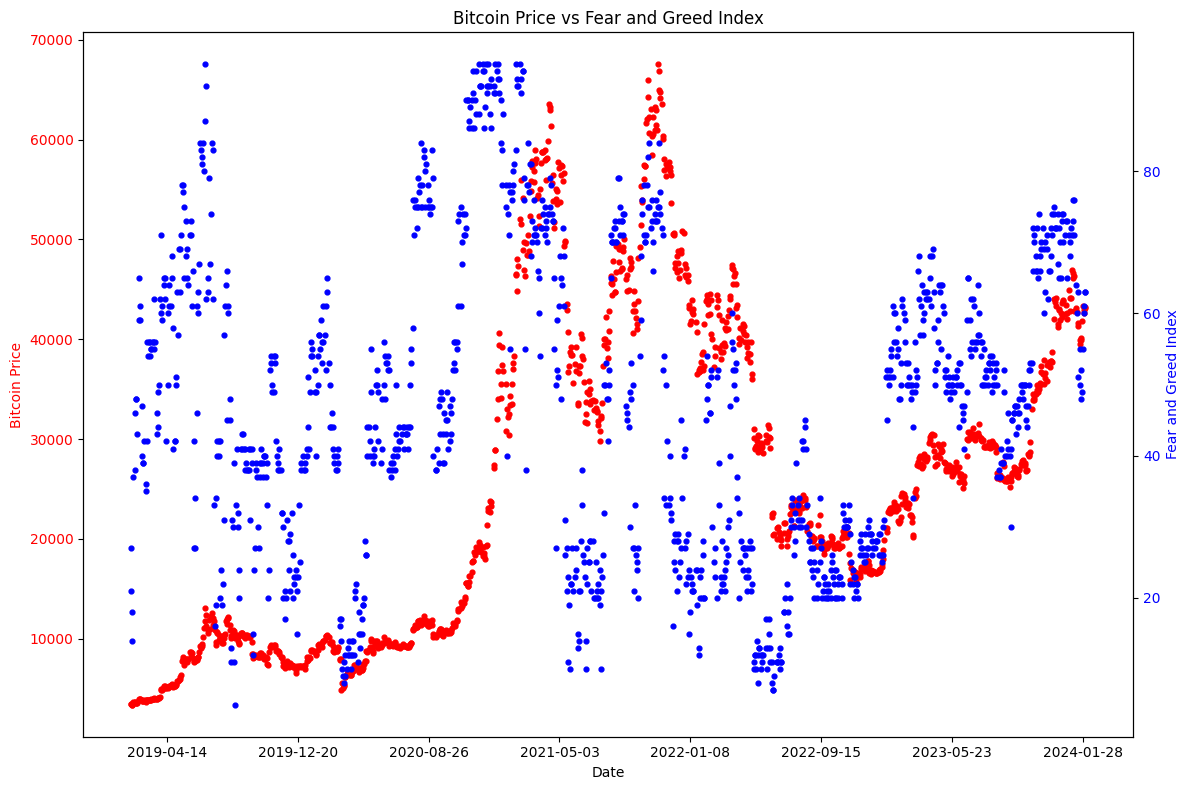

In [ ]:
from matplotlib.dates import DateFormatter

# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(12, 8))  # Increase figure size

# Scatter plot for Bitcoin Price
ax1.scatter(data.index, data['Bitcoin_Price'], color='red', label='Bitcoin Price', s=12)  # Increase marker size
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for Fear and Greed Index
ax2 = ax1.twinx()
ax2.scatter(data.index, data['fear_greed'], color='blue', label='Fear and Greed Index', s=12)  # Increase marker size
ax2.set_ylabel('Fear and Greed Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Bitcoin Price vs Fear and Greed Index')

# Set date format for x-axis ticks
date_format = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_format)

# Set tick locations to display every month
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Also, there is not spesific correlation between S&P 500 Price and Fear & Greed Index. I want to analyze correlation between Bitcoin Price and Fear & Greed Index more detailed.

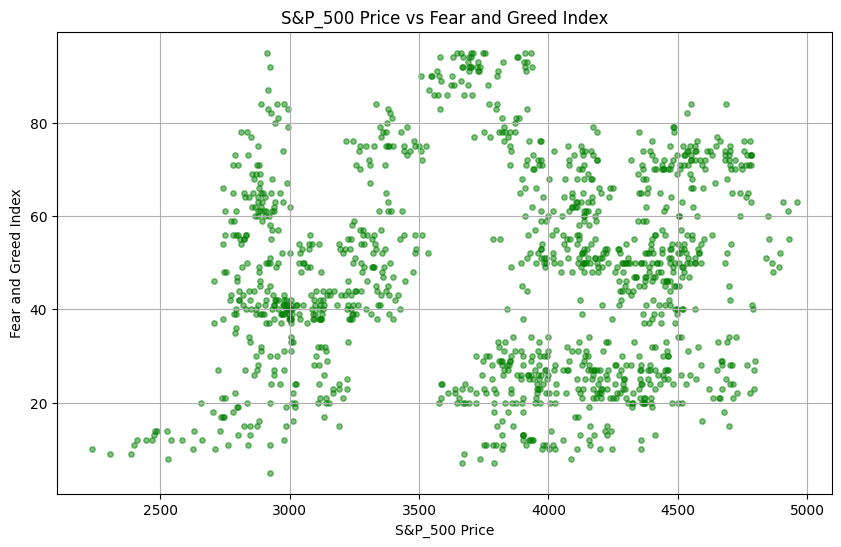

In [ ]:
# Step 1: Plot the Scatterplot
plt.figure(figsize=(10, 6))

# Plot Bitcoin prices in blue
plt.scatter(data['S&P_500_Price'], data['fear_greed'], color='green', alpha=0.5, label='S&P_500 Prices', s = 15)

plt.title('S&P_500 Price vs Fear and Greed Index')
plt.xlabel('S&P_500 Price')
plt.ylabel('Fear and Greed Index')
plt.grid(True)
plt.show()

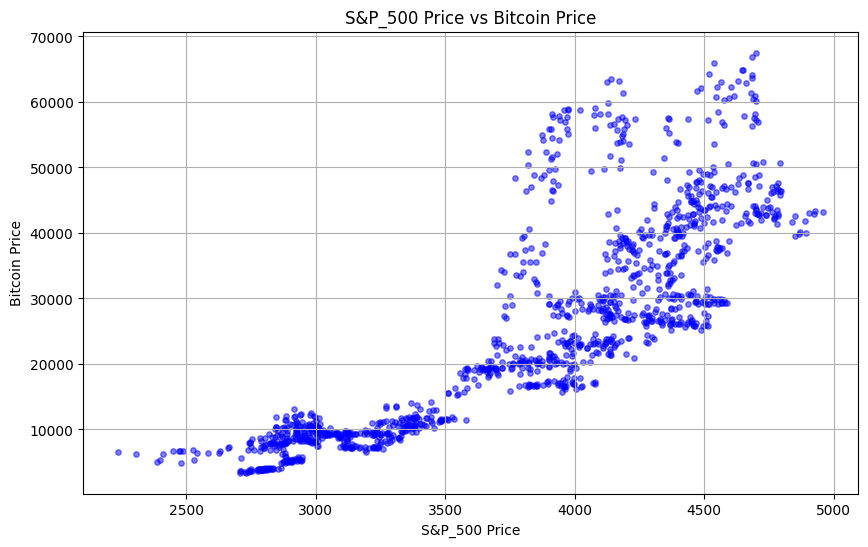

In [ ]:
# Step 1: Plot the Scatterplot
plt.figure(figsize=(10, 6))

# Plot Bitcoin prices in blue
plt.scatter(data['S&P_500_Price'], data['Bitcoin_Price'], color='blue', alpha=0.5, label='Bitcoin Prices', s = 15)

plt.title('S&P_500 Price vs Bitcoin Price')
plt.xlabel('S&P_500 Price')
plt.ylabel('Bitcoin Price')
plt.grid(True)
plt.show()

In this part, add_ema_column function add new column to the data DataFrame, calculates the 15-day EMA for Bitcoin prices, converts the 'EMA_15' column to float data type, and stores the result back into the data DataFrame.

Overall, this function facilitates the calculation and addition of the 15-day Exponential Moving Average (EMA) to the DataFrame containing Bitcoin prices. It is a kind of different technique.

In [ ]:
#  Parameters:
#  df (pandas.DataFrame): DataFrame containing Bitcoin prices.
#  window (int): Number of days for the EMA calculation. Default is 15.
#  Add a new column for the 15-day exponential moving average (EMA) to a DataFrame.
def add_ema_column(df, window=15):

    ema = df['Bitcoin_Price'].ewm(span=window, adjust=False).mean()  # Calculate EMA
    df['EMA_15'] = ema  # Add EMA column to DataFrame
    # Format the 'EMA_15' column to have only two decimal places
    df['EMA_15'] = df['EMA_15'].apply(lambda x: format(x, '.2f'))
    return df

#Returns:
#pandas.DataFrame: DataFrame with an additional column for the EMA.
data=add_ema_column(data,15)
data['EMA_15'] = data['EMA_15'].astype(float)
data

,Bitcoin_Price,Bitcoin_Vol.,S&P_500_Price,fear_greed,EMA_15
Date,,,,,
2019-02-04,3462.8,503920.0,2724.87,27,3462.80
2019-02-05,3468.4,460950.0,2737.70,21,3463.50
2019-02-06,3404.3,514210.0,2731.61,14,3456.10
2019-02-07,3397.7,471360.0,2706.05,18,3448.80
2019-02-08,3661.7,699230.0,2707.88,37,3475.41
...,...,...,...,...,...
2024-01-29,43299.8,45230.0,4927.93,55,42094.15
2024-01-30,42946.2,55130.0,4924.97,61,42200.65
2024-01-31,42580.5,56480.0,4848.87,60,42248.13


Also, there is not any observable relationship between EMA_15 of Bitcoin Price and Fear & Greed Index.

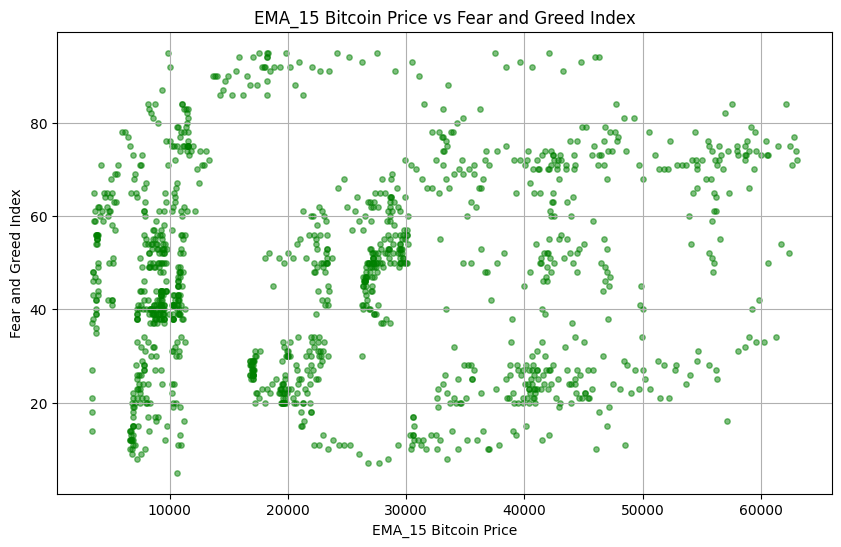

In [ ]:
# Step 1: Plot the Scatterplot
plt.figure(figsize=(10, 6))

# Plot Bitcoin prices in blue
plt.scatter(data['EMA_15'], data['fear_greed'], color='green', alpha=0.5, label='EMA_15 Prices', s = 15)

plt.title('EMA_15 Bitcoin Price vs Fear and Greed Index')
plt.xlabel('EMA_15 Bitcoin Price')
plt.ylabel('Fear and Greed Index')
plt.grid(True)
plt.show()

As you know, I did not find spesific correlation between Bitcoin price and Fear & Greed Index, so I decided to look at their short term fluctuations. This part snippet computes short-term fluctuations for the Fear and Greed Index, Bitcoin price, and 15-day Exponential Moving Average (EMA) using a low-pass filter. Overall, this code segment prepares the data for further analysis by computing short-term fluctuations in the Fear and Greed Index, Bitcoin price, and 15-day EMA using a low-pass filter. The resulting DataFrame (short_term_fluctuations_df) provides insights into short-term variations in these variables, which can be useful for identifying patterns or correlations.

In [ ]:
from scipy.signal import butter, filtfilt
from scipy.stats import pearsonr

# Extract relevant columns
feargreed = data['fear_greed']
price = data['Bitcoin_Price']

# Define low pass filter function
def short_term(data, cutoff, fs=1.0, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    # Design a Butterworth low-pass filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # Apply the filter to the data using filtfilt for zero-phase filtering
    y = filtfilt(b, a, data)
    return y

# Compute short-term fluctuations
cutoff = 10 / (0.5 * data.shape[0])  # Normalize cutoff frequency

# Compute short-term fluctuations for fear/greed index, Bitcoin price, and EMA_15
feargreed_short = 100 * (feargreed / short_term(feargreed, cutoff) - 1)
price_short = 100 * (price / short_term(price, cutoff) - 1)

# Create a DataFrame for fear/greed and Bitcoin price short-term fluctuations
short_term_fluctuations_df = pd.DataFrame({
    'FearGreed_Short': feargreed_short,
    'Bitcoin_Price_Short': price_short
}, index=data.index)

short_term_fluctuations_df

,FearGreed_Short,Bitcoin_Price_Short
Date,,
2019-02-04,2.025078,0.792045
2019-02-05,-24.269383,0.370462
2019-02-06,-51.739214,-2.055645
2019-02-07,-40.588308,-2.812060
2019-02-08,17.128346,4.133448
...,...,...
2024-01-29,-16.667682,-1.050648
2024-01-30,-7.514895,-1.862474
2024-01-31,-8.979411,-2.700746


I also tested that the model works better when I look at a smaller date range, it gives higher R^2

In [ ]:
#  short_term_fluctuations_df = short_term_fluctuations_df[300:]

Before removing outliers, the R^2 is 0.661, This visualization allows us to assess the relationship between short-term fluctuations in the Fear/Greed Index and Bitcoin price, with the correlation coefficient indicating the strength and direction of this relationship.

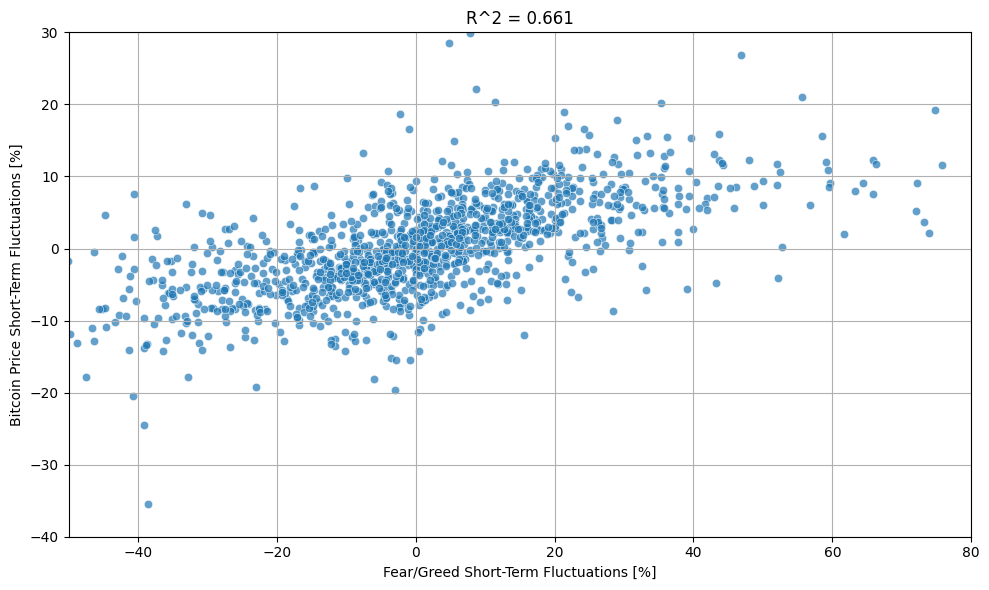

In [ ]:
# Calculate correlation coefficient
correlation = short_term_fluctuations_df[['FearGreed_Short', 'Bitcoin_Price_Short']].corr().iloc[0, 1]
correlation_text = f'R^2 = {correlation:.3f}'

# Create scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=short_term_fluctuations_df, x='FearGreed_Short', y='Bitcoin_Price_Short', alpha=0.7)
plt.title(correlation_text)
plt.xlabel('Fear/Greed Short-Term Fluctuations [%]')
plt.ylabel('Bitcoin Price Short-Term Fluctuations [%]')
plt.grid(True)

# Set the limits for x-axis and y-axis
plt.xlim(-50, 80)  # Fear/Greed index range
plt.ylim(-40, 30)   # Bitcoin price fluctuation range
plt.tight_layout()
plt.show()

By removing outlier rows based on percentiles, this code helps ensure that the analysis or modeling conducted on the data is not unduly influenced by extreme values. It focuses on retaining data points within a specified range of the distribution, making the dataset more robust for further analysis.

In [ ]:
# Dropping the outlier rows with Percentiles
"""
upper_limBTC = short_term_fluctuations_df['Bitcoin_Price_Short'].quantile(.95)
lower_limBTC = short_term_fluctuations_df['Bitcoin_Price_Short'].quantile(.05)

short_term_fluctuations_df = short_term_fluctuations_df[(short_term_fluctuations_df['Bitcoin_Price_Short'] < upper_limBTC) & (short_term_fluctuations_df['Bitcoin_Price_Short'] > lower_limBTC)]

# Dropping the outlier rows with Percentiles
upper_limFEAR = short_term_fluctuations_df['FearGreed_Short'].quantile(.95)
lower_limFEAR = short_term_fluctuations_df['FearGreed_Short'].quantile(.05)

short_term_fluctuations_df = short_term_fluctuations_df[(short_term_fluctuations_df['FearGreed_Short'] < upper_limFEAR) & (short_term_fluctuations_df['FearGreed_Short'] > lower_limFEAR)]
"""

"\nupper_limBTC = short_term_fluctuations_df['Bitcoin_Price_Short'].quantile(.95)\nlower_limBTC = short_term_fluctuations_df['Bitcoin_Price_Short'].quantile(.05)\n\nshort_term_fluctuations_df = short_term_fluctuations_df[(short_term_fluctuations_df['Bitcoin_Price_Short'] < upper_limBTC) & (short_term_fluctuations_df['Bitcoin_Price_Short'] > lower_limBTC)]\n\n# Dropping the outlier rows with Percentiles\nupper_limFEAR = short_term_fluctuations_df['FearGreed_Short'].quantile(.95)\nlower_limFEAR = short_term_fluctuations_df['FearGreed_Short'].quantile(.05)\n\nshort_term_fluctuations_df = short_term_fluctuations_df[(short_term_fluctuations_df['FearGreed_Short'] < upper_limFEAR) & (short_term_fluctuations_df['FearGreed_Short'] > lower_limFEAR)]\n"

After removing outliers, R^2 is 0.601. When I remove outliers, R^2 decreased. the decrease in R^2 when removing outliers indicates a change in the relationship between the variables captured by the model, so I do not prefer to remove outliers.

Also, I want to look at correlation between EMA_15 price of Bitcoin and Fear & Greed Index. R^2 is 0.371, so it is smaller than the R^2 (0.66) of short term fluctuations of Bitcoin price. There is spesific difference. Overall, the discrepancy in R'2 values between the EMA of Bitcoin price and short-term fluctuations of Bitcoin price suggests differences in how effectively each metric captures and represents short-term price movements. It's essential to consider the characteristics of each metric, the underlying assumptions, and the specific behavior of Bitcoin prices when interpreting these results.

This standardized scatter plot allows for a comparison of the relative positions of each data point along the standardized scales of the Fear/Greed Index and Bitcoin price fluctuations. Standardization ensures that both variables have a mean of 0 and a standard deviation of 1, making it easier to interpret their relative positions and relationships on the plot.

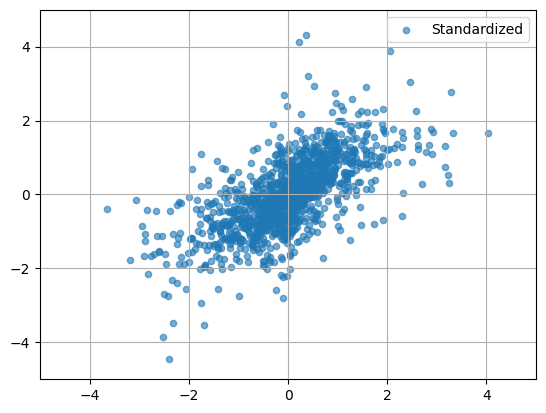

In [ ]:
def scatter(x, y, label):
  ax = plt.gca()
  ax.scatter(x, y, alpha=0.6, s=20, label=label)
  ax.set_xbound(-5, 5)
  ax.set_ybound(-5, 5)
  ax.grid()
  ax.legend()

def standardize(x):
  mean = x.mean()
  std = np.std(x)
  return (x - mean) / std

scatter(standardize(short_term_fluctuations_df["FearGreed_Short"]), standardize(short_term_fluctuations_df["Bitcoin_Price_Short"]), "Standardized")

# Hypothesis Testing

In [ ]:
import statsmodels.api as sm
from scipy import stats

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(short_term_fluctuations_df['Bitcoin_Price_Short'], short_term_fluctuations_df['FearGreed_Short'])

# Set significance level (alpha)
alpha = 0.05

# Perform hypothesis test
if p_value < alpha:
    print("Reject null hypothesis (H0): There is a statistically significant linear relationship between short term fluctuations of Bitcoin_Price and  short term fluctuations of Fear&Greed Index.")
else:
    print("Fail to reject null hypothesis (H0): Insufficient evidence for a statistically significant linear relationship.")

Reject null hypothesis (H0): There is a statistically significant linear relationship between short term fluctuations of Bitcoin_Price and  short term fluctuations of Fear&Greed Index.


# Linear Regression

In [ ]:
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from os.path import join
from sklearn.metrics import mean_squared_error

In [ ]:
# This function calculates the coefficient of determination (R-squared) between the observed and predicted values.
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)

In [ ]:
# Split the data into features (X) and target variable (y)

X = standardize(short_term_fluctuations_df[['FearGreed_Short']] ) # Features
y =standardize( short_term_fluctuations_df[['Bitcoin_Price_Short']])  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = model.score(X, y)
print(f"R-squared value: {r2_score}")

# Print model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Mean Squared Error: 0.4943704255065399
R-squared value: 0.43734736344928915
Intercept: [-0.0036941]
Coefficients: [[0.66794596]]


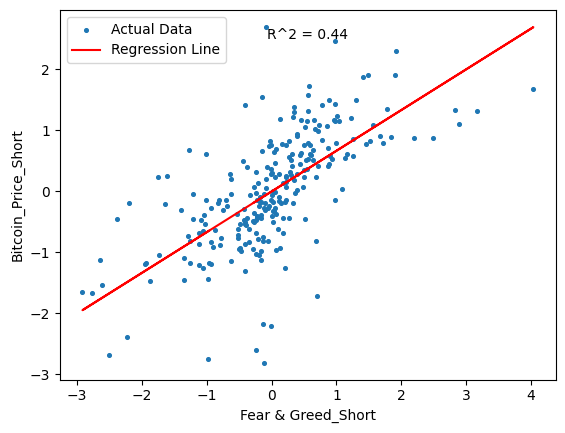

In [ ]:
# Assuming X and y are pandas DataFrame objects

X_values = X_test.squeeze()  # Convert DataFrame to 1D array
y_values = y_test.squeeze()  # Convert DataFrame to 1D array

plt.scatter(X_values, y_values, s=7, label='Actual Data')
plt.plot(X_values, y_pred, color='red', label='Regression Line')

plt.xlabel('Fear & Greed_Short')  # Add x-axis label
plt.ylabel('Bitcoin_Price_Short')  # Add y-axis label

# Calculate R^2 value
r_squared = model.score(X_test, y_test)

# Add R^2 value to the plot
plt.text(0.5, 0.95, f'R^2 = {r_squared:.2f}', ha='center', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend()
plt.show()

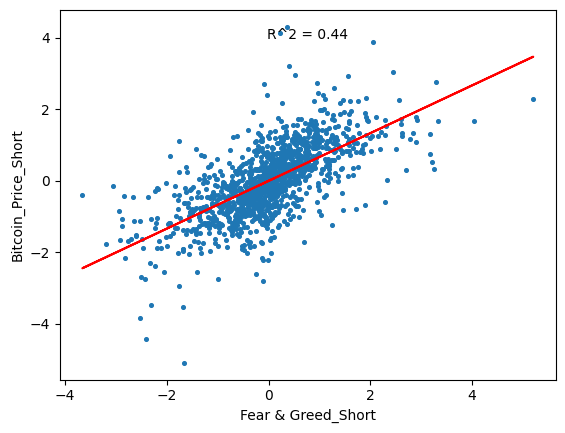

In [ ]:
# Assuming X and y are pandas DataFrame objects

X_values = X.squeeze()  # Convert DataFrame to 1D array
y_values = y.squeeze()  # Convert DataFrame to 1D array

# Make predictions
Y_pred = model.predict(X)

# Plot the data points and regression line

plt.scatter(X_values, y_values, s=7)
plt.plot(X_values, Y_pred, color='red')

# Calculate R^2 value

r_squared = model.score(X, y)

# Add R^2 value to the plot

plt.text(0.5, 0.95, f'R^2 = {r_squared:.2f}', ha='center', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel('Fear & Greed_Short')  # Add x-axis label
plt.ylabel('Bitcoin_Price_Short')  # Add y-axis label
plt.show()

# Machine Learning Algorithms



## kNN Model

kNN Model

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
short_term_fluctuations_df.head()

,FearGreed_Short,Bitcoin_Price_Short
Date,,
2019-02-04,2.025078,0.792045
2019-02-05,-24.269383,0.370462
2019-02-06,-51.739214,-2.055645
2019-02-07,-40.588308,-2.812060
2019-02-08,17.128346,4.133448


I split the data into feature and target variables (Bitcoin price).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Split the data into features (X) and target variable (y)

X = short_term_fluctuations_df[['FearGreed_Short']] # Features
y = short_term_fluctuations_df[['Bitcoin_Price_Short']].values  # Dependent variable

X = scaler.fit_transform(X)
y = scaler.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
k_values = np.arange(1, 20, 1)

# Dictionary to store errors for each k
errors = {}

# Train and evaluate the k-NN model for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors[k] = error

# Find the k value with the minimum error
optimal_k = min(errors, key=errors.get)
min_error = errors[optimal_k]

# Train the model with the optimal k value
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimal))

print(f"The optimal k value is: {optimal_k}")
print(f"The RMSE is: {rmse:.5f}")

The optimal k value is: 19
The RMSE is: 0.21744


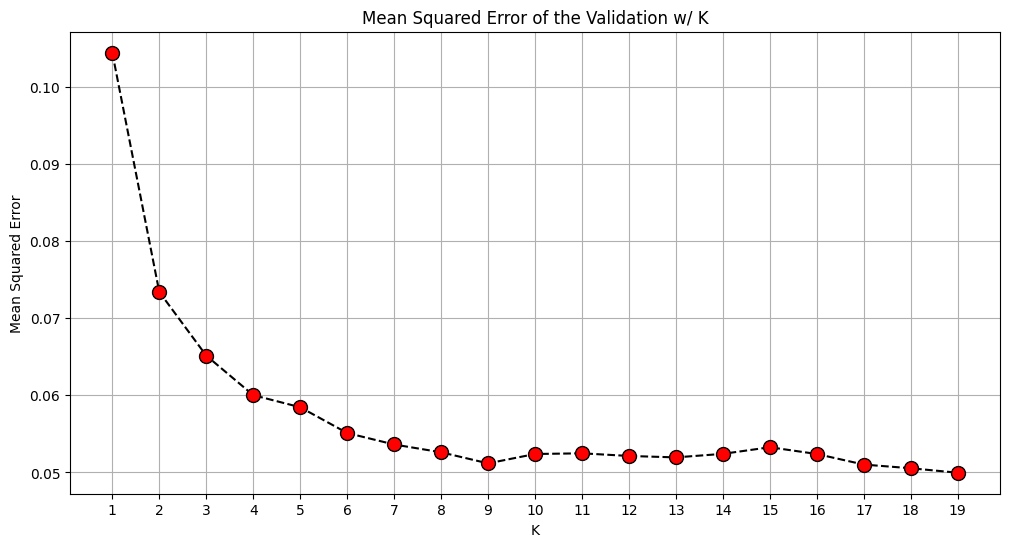

In [ ]:
K_range = np.arange(1, 20, 1)
mse_list = []

for k in K_range:
    # create a new model with current K
    knn = KNeighborsRegressor(n_neighbors=k)
    # fit training data
    knn.fit(X_train, y_train)
    # predict the validation data
    y_pred = knn.predict(X_val)
    # obtain the MSE value
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)

plt.figure(figsize=(12, 6))
plt.plot(K_range, mse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error of the Validation w/ K')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
# Initialize and train the kNN model
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f'kNN Mean Squared Error: {knn_mse}')
print(f"kNN Regressor R²: {knn_r2}")

kNN Mean Squared Error: 0.04728200108560156
kNN Regressor R²: 0.41700720643481504


## Decision Tree Model

Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
# Split the data into features (X) and target variable (y)

X = short_term_fluctuations_df[['FearGreed_Short']] # Features
y = short_term_fluctuations_df[['Bitcoin_Price_Short']].values  # Dependent variable

X = scaler.fit_transform(X)
y = scaler.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# This will create train and test datasets from the original dataset that we have where
# 80% of original dataframe will be train set and 20% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
print(X_train.shape, X_test.shape)

(994, 1) (249, 1)


In [ ]:
# Define the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid for Grid Search
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Build the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = best_dt_model.predict(X_test)

# Evaluation
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"\nDecision Tree Regressor MSE: {dt_mse}")
print(f"Decision Tree Regressor R²: {dt_r2}")

Best Hyperparameters:
{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

Decision Tree Regressor MSE: 0.04447274986821673
Decision Tree Regressor R²: 0.45164561380857404


# Evaluation

In [ ]:
# Comparison
if knn_mse < dt_mse:
    print("kNN Model performs better comparing to mean square error.")
elif dt_mse < knn_mse:
    print("Decision Tree Model performs better comparing to mean square error.")
else:
    print("Both models perform similarly.")

if knn_r2 < dt_r2:
    print("Decision Tree Model performs better comparing to R square value.")
else:
    print("kNN Model performs better comparing to R square value.")

Decision Tree Model performs better comparing to mean square error.
Decision Tree Model performs better comparing to R square value.
